# Defining the Question


### a) Specifying the Question
Perform an Exploratory Data Analysis on the 2021 Olympics Dataset given.

### b) Defining the Metric for Success

This project will be considered successful if we are able to perform extensive EDA on the dataset provided.

### c) Understanding the context

This contains the details of over 11,000 athletes, with 47 disciplines, along with 743 Teams taking part in the 2021(2020) Tokyo Olympics. This dataset contains the details of the Athletes, Coaches, Teams participating as well as the Entries by gender. It contains their names, countries represented, discipline, gender of competitors, name of the coaches.

This dataset was sourced from KAggle, for more info check: https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo

### d) Recording the Experimental Design

Defining the Question
Reading the Data.
Checking the Data.
Data Cleaning
Performing EDA
Conclusion

# Data Preparation

### Importing our Libraries

In [1]:
# installing the necessary libraries not in google colab
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (34.6 MB)


In [2]:
!pip install plotly

In [3]:
# Let us first import all the libraries we will need for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import re
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px
import pandas_profiling
from pandas_profiling import ProfileReport
from scipy import stats
from scipy.stats import norm
import math
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [4]:
# let us set the warnings that may appear in our analysis off

import warnings
warnings.filterwarnings('ignore') 

# subsequently let us set the pandas warning for chained assignments off
pd.options.mode.chained_assignment = None  # default='warn'

### Loading and Checking our Data

In [5]:
# Loading the Dataset from the source i.e. csv
df_athletes = pd.read_excel('/home/shiro/Downloads/202 Olympics Data/Athletes.xlsx')
df_coaches = pd.read_excel('/home/shiro/Downloads/202 Olympics Data/Coaches.xlsx')
df_medals = pd.read_excel('/home/shiro/Downloads/202 Olympics Data/Medals.xlsx')
df_gender = pd.read_excel('/home/shiro/Downloads/202 Olympics Data/EntriesGender.xlsx')
df_teams = pd.read_excel('/home/shiro/Downloads/202 Olympics Data/Teams.xlsx')

In [6]:
# Determining the no. of records in our datasets
#
print('This athletes dataset has ' + str(df_athletes.shape[0]) + ' rows, and ' + str(df_athletes.shape[1]) + ' columns')
print('This coaches dataset has ' + str(df_coaches.shape[0]) + ' rows, and ' + str(df_coaches.shape[1]) + ' columns')
print('This medals dataset has ' + str(df_medals.shape[0]) + ' rows, and ' + str(df_medals.shape[1]) + ' columns')
print('This gender dataset has ' + str(df_gender.shape[0]) + ' rows, and ' + str(df_gender.shape[1]) + ' columns')
print('This teams dataset has ' + str(df_teams.shape[0]) + ' rows, and ' + str(df_teams.shape[1]) + ' columns')

This athletes dataset has 11085 rows, and 3 columns
This coaches dataset has 394 rows, and 4 columns
This medals dataset has 93 rows, and 7 columns
This gender dataset has 46 rows, and 4 columns
This teams dataset has 743 rows, and 4 columns


We shall investigate each dataset on its own 

# Athletes Dataset

In [7]:
df_athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [8]:
# Checking whether each column has an appropriate datatype
#
df_athletes.dtypes

Name          object
NOC           object
Discipline    object
dtype: object

In [9]:
# checking the dataset information
df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 entries, 0 to 11084
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        11085 non-null  object
 1   NOC         11085 non-null  object
 2   Discipline  11085 non-null  object
dtypes: object(3)
memory usage: 259.9+ KB


In [10]:
# Checking the entire profile of the dataframe
profile = ProfileReport(df_athletes, title=" Athletes Dataframe Profile Report", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# let us make a copy of our dataset to clean and do eda on
athletes = df_athletes.copy(deep = True)

In [12]:
# For consistency, the column names should be uniform
# Let us change all column names to lower case
#
athletes.columns = athletes.columns.str.lower()
# Previewing the columns to confirm whether the changes have taken effect
#
athletes.columns

Index(['name', 'noc', 'discipline'], dtype='object')

In [13]:
# from the profile report we can see that we have no missing values,
# but let us confirm anyway
null_list = list(athletes.columns.values)

for n in null_list:
    print (n,": ",sum(pd.isnull(athletes[n])))
#We have missing values in the credit product column

name :  0
noc :  0
discipline :  0


In [14]:
# From our profile report, we can see that we have some duplicated rows
# let us drop them 
athletes.duplicated().sum()
athletes.drop_duplicates(inplace = True)
athletes.duplicated().sum()

0

Let us do some EDA now

In [46]:
# count number of atheletes representing each country
fig1_data = athletes.groupby('noc').agg({'name': 'count'}).reset_index()
# plot
fig1 = px.choropleth(
    data_frame = fig1_data, # data frame
    locations = 'noc', # country names
    locationmode = 'country names', 
    color = 'name', # color the map w.r.t. # of athletes
    labels = dict( 
        noc = 'Country', 
        name = 'Number of Athletes'
    ), # fix the axis label names
    color_continuous_scale = 'YlOrRd', # color map
    range_color = (0, 700), # fix the range for the legend
    title = 'Worldwide Distribution of Athletes', # plot title
    hover_name='noc', # specify information to display for interactivity
    hover_data={'name':True, 'noc':False},
    height = 500, # height and width of the figure
    width = 800
)

fig1.update_geos(
    resolution=110, # higher quality maps
    showland=True, landcolor="white", # map properties 
    showocean=True, oceancolor="paleturquoise"
)

fig1.update_layout(
    title=dict(font=dict(family='Rockwell', size=25)), # font title
    font=dict(family='Verdana', size=13) # axis labels font
)
fig1.show()

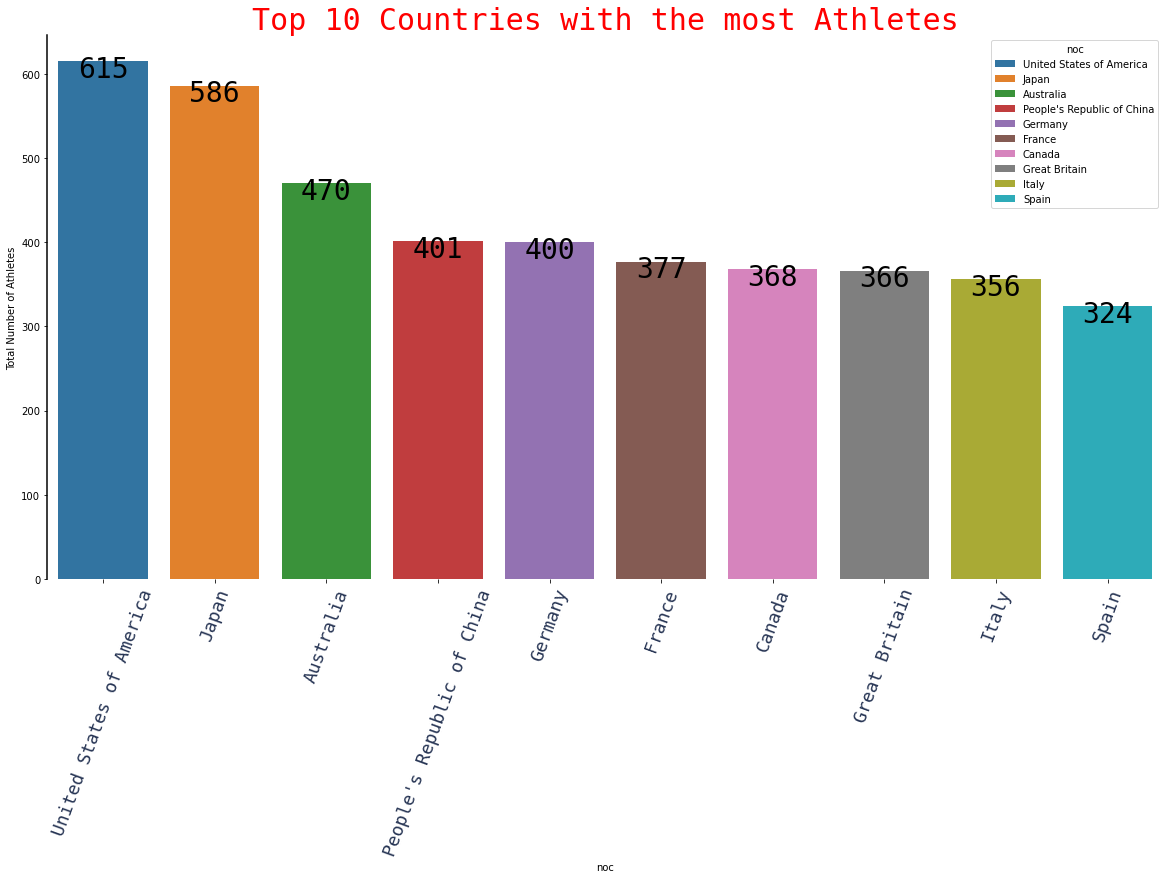

In [44]:
top_10_countries = athletes.groupby('noc')['name'].count().sort_values(ascending=False).reset_index(name='Total Number of Athletes').head(10)

plt.figure(figsize=(20,10))

a = sns.barplot(data=top10_countries, x='noc', y='Total Number of Athletes', hue='noc', dodge=False)

plt.title('Top 10 Countries with the most Athletes', size = 30, fontname='monospace', color='red')

plt.xticks(rotation=70, fontsize=18, fontname='monospace', color='#283655')

a.spines['left'].set_linewidth(1.5)

for w in ['right', 'top', 'bottom']:
    a.spines[w].set_visible(False)

for p in a.patches:
    height=np.nan_to_num(p.get_height(), 0)
    a.annotate(f'{int(height)}', (p.get_x()+p.get_width()/2, p.get_height()-15.0), ha='center', va='center', size=28, xytext=(0, 5), textcoords='offset points', color='black', 
               fontname='monospace')
    
plt.show()

In [47]:
fig=px.pie(athletes['discipline'].value_counts().reset_index().rename(columns={'discipline': 'count'}), values='count', names='index', width=1450, height=800)

fig.update_traces(textposition='inside', textinfo='percent+label', hole=0.7, marker=dict(colors=['#90afc5','#336b87','#2a3132','#763626'], 
                                                                                           line=dict(color='white', width=2)))

fig.update_layout(annotations=[dict(text='The count of disciplines <br>perticipated by the athletes', x=0.5, y=0.5, font_size=26, showarrow=False, 
                                    font_family='monospace', font_color='#283655')],
                  showlegend = False)
                  
fig.show()